In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import os
import random


In [3]:
train_dir=r"C:\Users\dell\Downloads\Pneumonia X Ray-20221031T100017Z-001\Pneumonia X Ray\train"
test_dir=r"C:\Users\dell\Downloads\Pneumonia X Ray-20221031T100017Z-001\Pneumonia X Ray\test"

In [4]:
train_gen=ImageDataGenerator(rescale=1./255).flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 3937 images belonging to 2 classes.


In [5]:
test_gen=ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 624 images belonging to 2 classes.


In [6]:
class_name=list(train_gen.class_indices.keys())
print("Classes:",class_name)

Classes: ['NORMAL', 'PNEUMONIA']


In [7]:
model=Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(16,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
    
          
])

In [8]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [9]:
history=model.fit(train_gen,validation_data=test_gen,epochs=5,verbose=1)

Epoch 1/5
124/124 [==============================] - 346s 3s/step - loss: 0.3557 - accuracy: 0.8473 - val_loss: 0.7313 - val_accuracy: 0.7596
Epoch 2/5
124/124 [==============================] - 195s 2s/step - loss: 0.1306 - accuracy: 0.9456 - val_loss: 0.8526 - val_accuracy: 0.7756
Epoch 3/5
124/124 [==============================] - 228s 2s/step - loss: 0.1129 - accuracy: 0.9563 - val_loss: 1.1200 - val_accuracy: 0.7324
Epoch 4/5
124/124 [==============================] - 217s 2s/step - loss: 0.0976 - accuracy: 0.9629 - val_loss: 0.4685 - val_accuracy: 0.8141
Epoch 5/5
124/124 [==============================] - 213s 2s/step - loss: 0.0780 - accuracy: 0.9705 - val_loss: 0.9632 - val_accuracy: 0.7788


In [14]:
x_test,y_test=next(test_gen)
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Predicted: {test_acc*100:.2f}%")

1/1 [==============================] - 0s 249ms/step - loss: 0.6783 - accuracy: 0.8438
Predicted: 84.38%


In [15]:
predictions=model.predict(x_test)

1/1 [==============================] - 0s 347ms/step


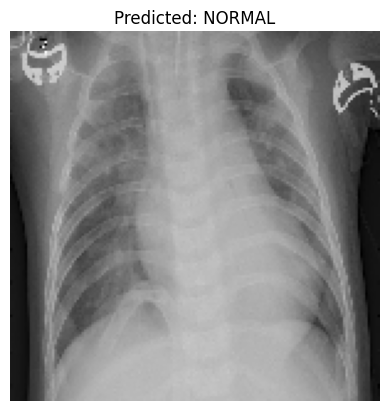

In [18]:
idx=random.randint(0,len(x_test)-1)
plt.imshow(x_test[idx],cmap='gray')
plt.title(f"Predicted: {class_name[np.argmax(predictions[idx])]}")
plt.axis('off')
plt.show()

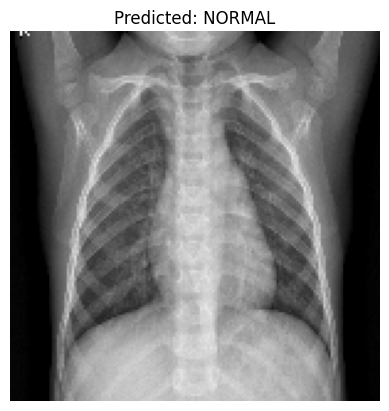

In [19]:
idx=random.randint(0,len(x_test)-1)
plt.imshow(x_test[idx],cmap='gray')
plt.title(f"Predicted: {class_name[np.argmax(predictions[idx])]}")
plt.axis('off')
plt.show()

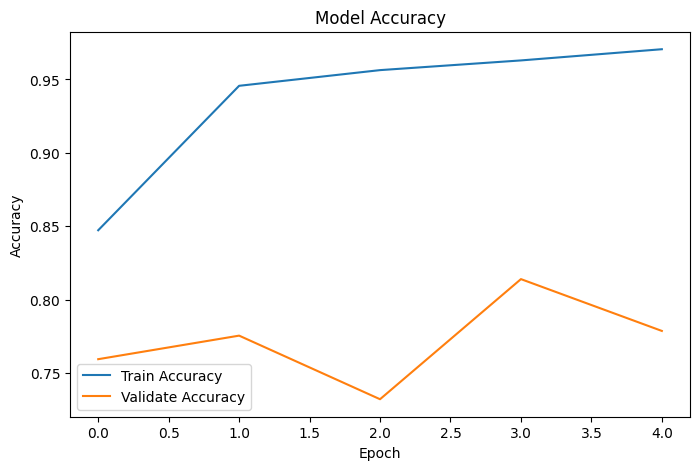

In [20]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validate Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

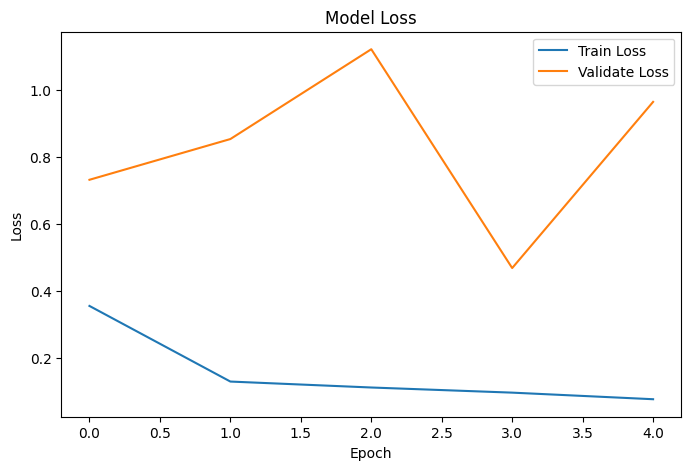

In [21]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validate Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()